Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **44 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nahom Agize"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Randomized quicksort

## Part A. Median-of-3 partitioning quicksort 

## Question 1 [time estimate: 10 minutes]

Read through the following Python code. What does each function (i.e., median, qsort, randomized_qsort, test_qsort) do? Comment in details each function. 


In [1]:
import timeit
import random

eps = 1e-16
N = 10000
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):           #finding the median among any three given index values
    if (x1 < x2 < x3) or (x3 < x2 < x1):
        return x2
    elif (x1 < x3 < x2) or (x2 < x3 < x1):
        return x3
    else:
        return x1

def qsort(lst):                  # defining a quick sort function that makes use of the median function to choose a pivot.
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def randomized_quicksort():          # randomly suffles a list and makes use of the qsort funciton to find a randomized quicksort
    lst = [i for i in range(N)]
    random.shuffle(lst)
    return qsort(lst)


def test_quicksort():                # defining a funciton that checks whether or not the randomized_quicksort function actually sorted the list. 
    lst = randomized_quicksort()
    assert (lst == [i for i in range(N)])


# Is our algorithm correct
test_quicksort()

# How fast is our algorithm
print(timeit.timeit(randomized_quicksort, number=1))

0.14009780000003502


## Question 2 [time estimate: 3 minutes]

What are the main differences between the `randomized_quicksort` in the code and $RANDOMIZED-QUICKSORT$ in Cormen et al., besides that the partition of `randomized_quicksort` uses a median of 3 as a pivot?

Besides the mentioned point, we see that the randomization occurs at different level for the two algorithms. For the Corment et al. RANDOMIZED-QUICKSORT, it used a RANDOMIZED-PARTITION with random.sample, which is basically randomly selecting a number from the array and exchanging places with our previous pivot, such that the newly selected number becomes our pivot. In contrast, this notebook does none of that. Instead, it is using the qsort function we have used in previous classes, but applying it only an randomized list using the method random.shuffle.

## Question 3 [time estimate: 10 minutes]

What is the time complexity of this `randomized_qsort`? Time the algorithm on lists of various lengths, each list being a list of the first $n$ consecutive positive integers. Produce a graph with list lengths on the x axis and running time on the y axis. As always, don’t forget to time the algorithm several times for each list’s length and then average the results. 

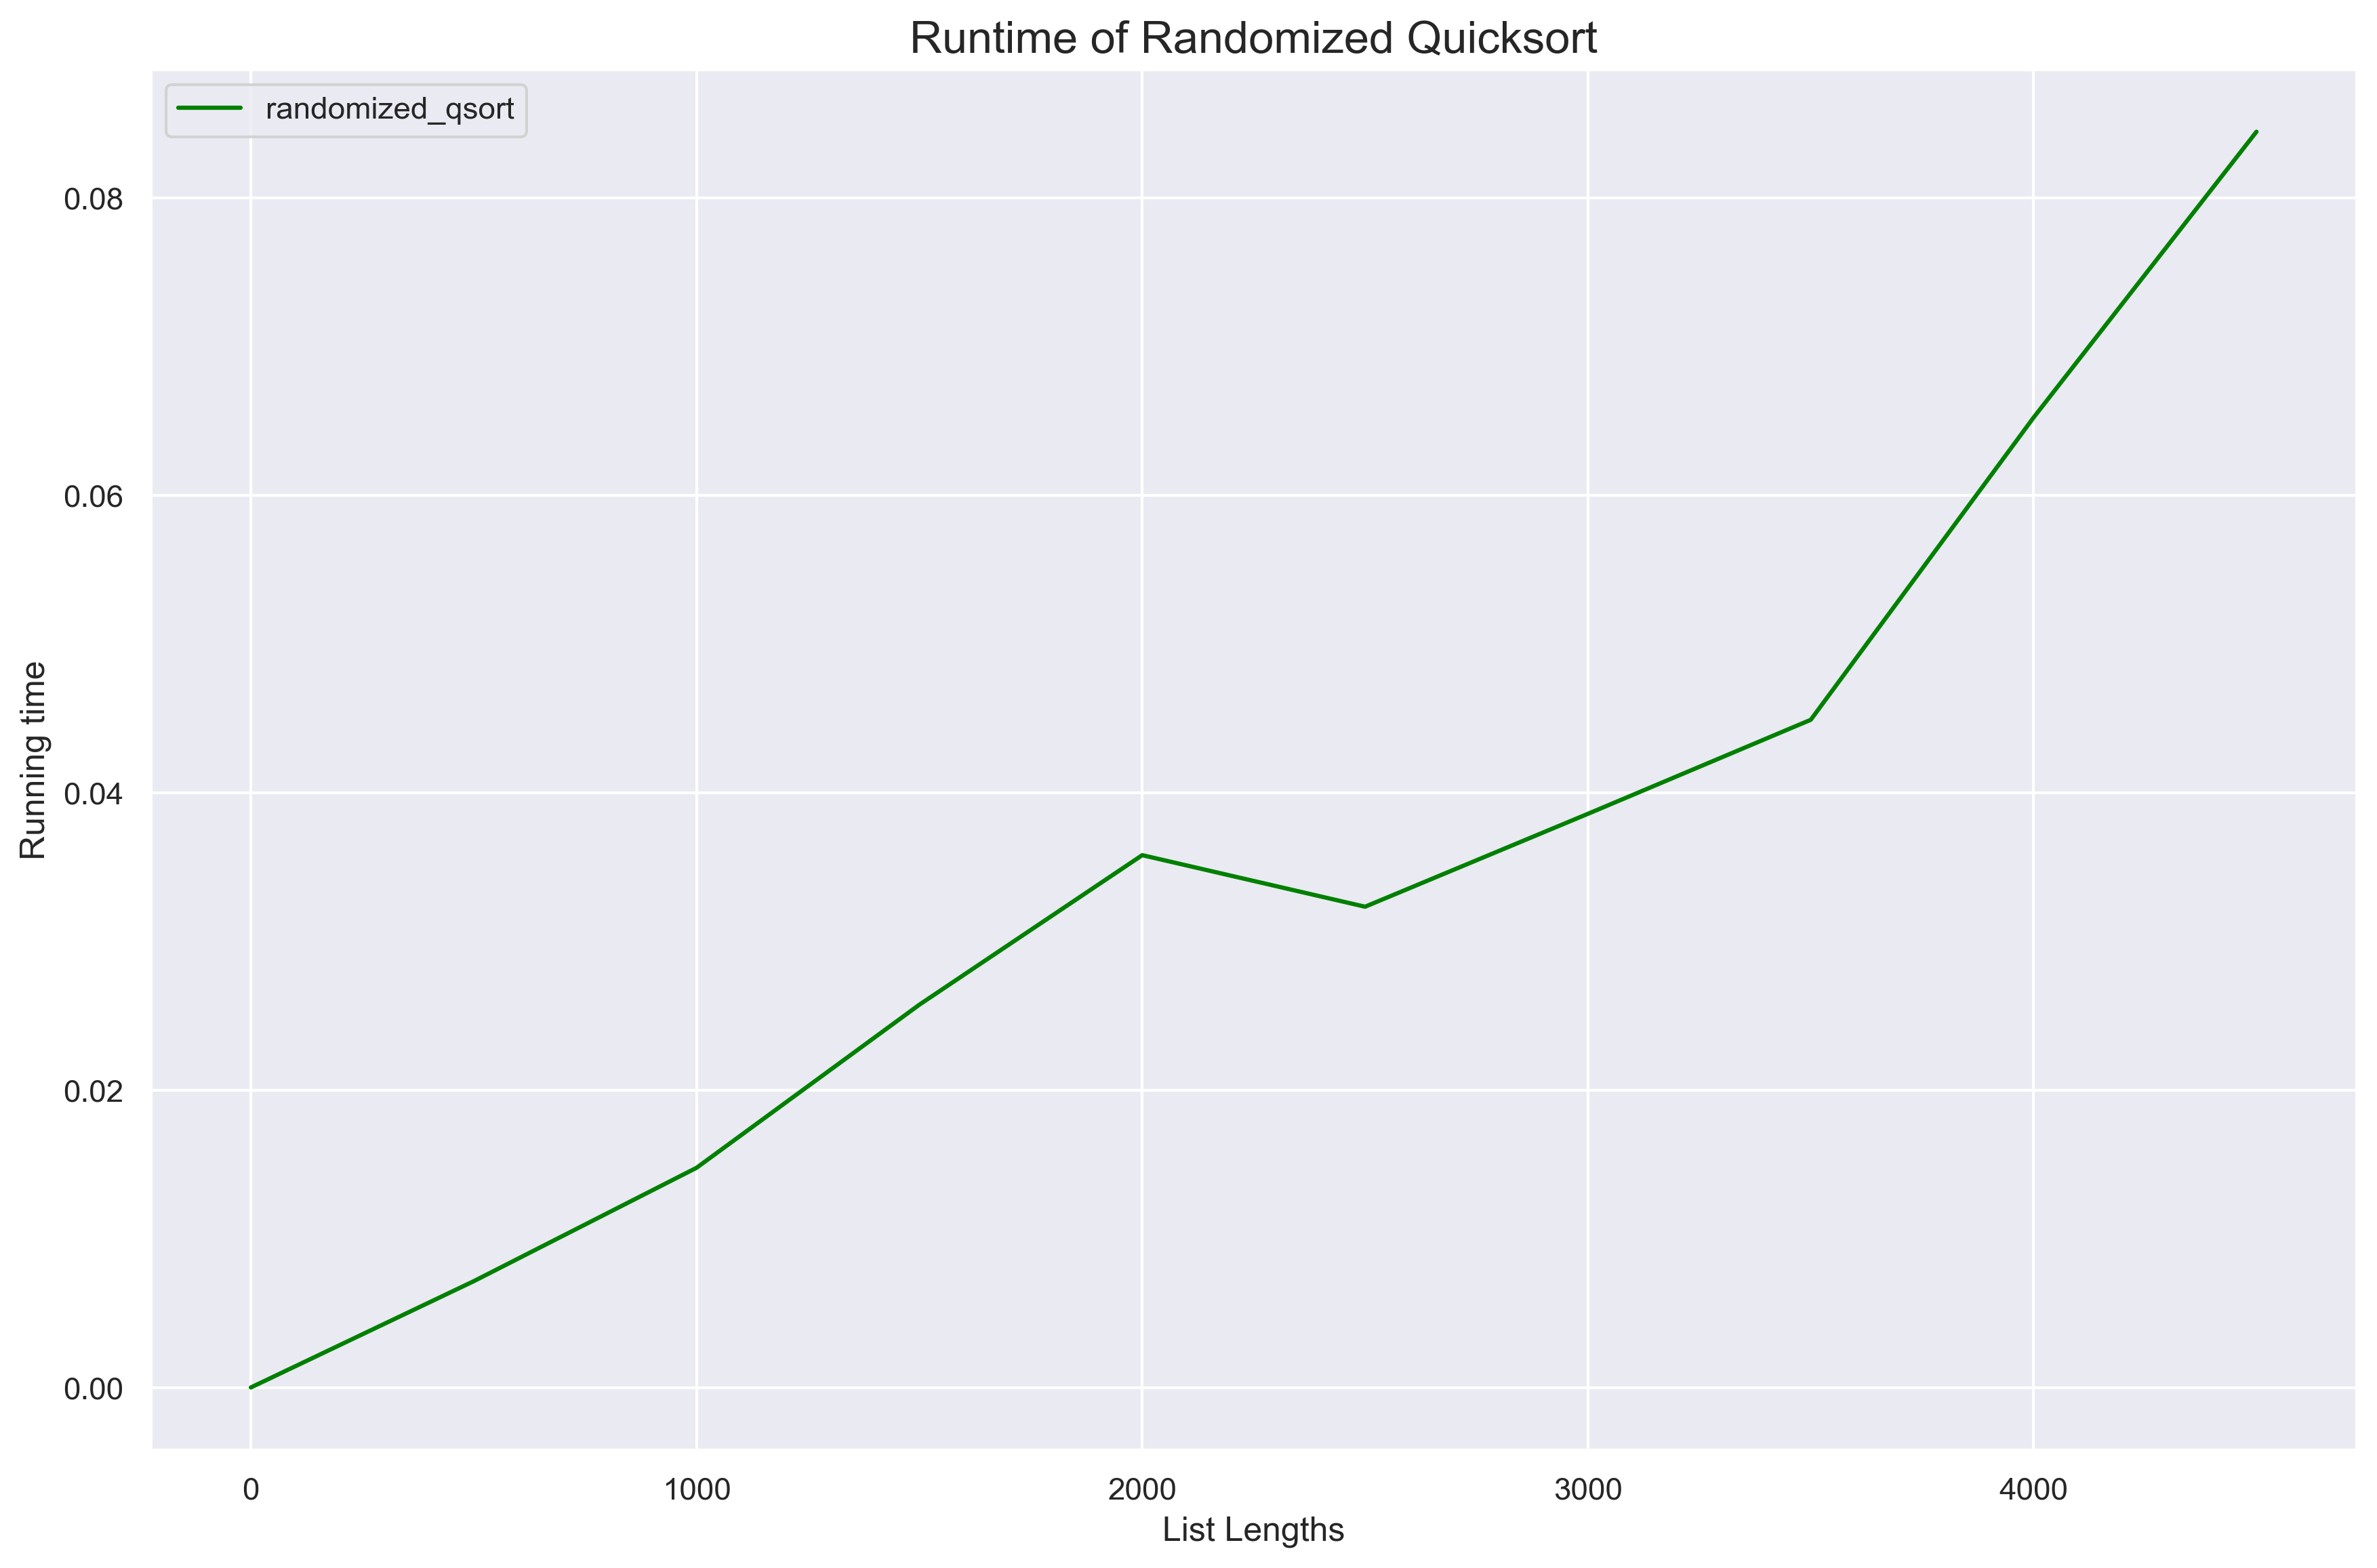

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

iterations = []
count = []

for i in range(10):
    
    N = 500*i
    count.append(N)
    
    iteration = 0 
    
    for _ in range(10):
        iteration += timeit.timeit(randomized_quicksort, number = 1)
        
    iterations.append(iteration/10)  

#raise NotImplementedError()

plt.figure(figsize=(14,9), dpi=300)
plt.title("Runtime of Randomized Quicksort", fontsize=16)
plt.plot(count, iterations, label="randomized_qsort", color="green")
plt.xlabel("List Lengths")
plt.ylabel("Running time")
plt.legend()
plt.show()


## Question 4.

### Question 4a [time estimate: 7 minutes]

Change the `qsort()` function in a way that you **don’t** separate the items that are equal to the partition. 


In [13]:
def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition]            #We do not need to multiply by counts since item equal to the partition need not be included
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst
    #raise NotImplementedError()

In [12]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 4b [time estimate: 3 minutes]

Now time the algorithm on the same inputs you have used in question 3, adding one more line in the previous graph you have produced. 

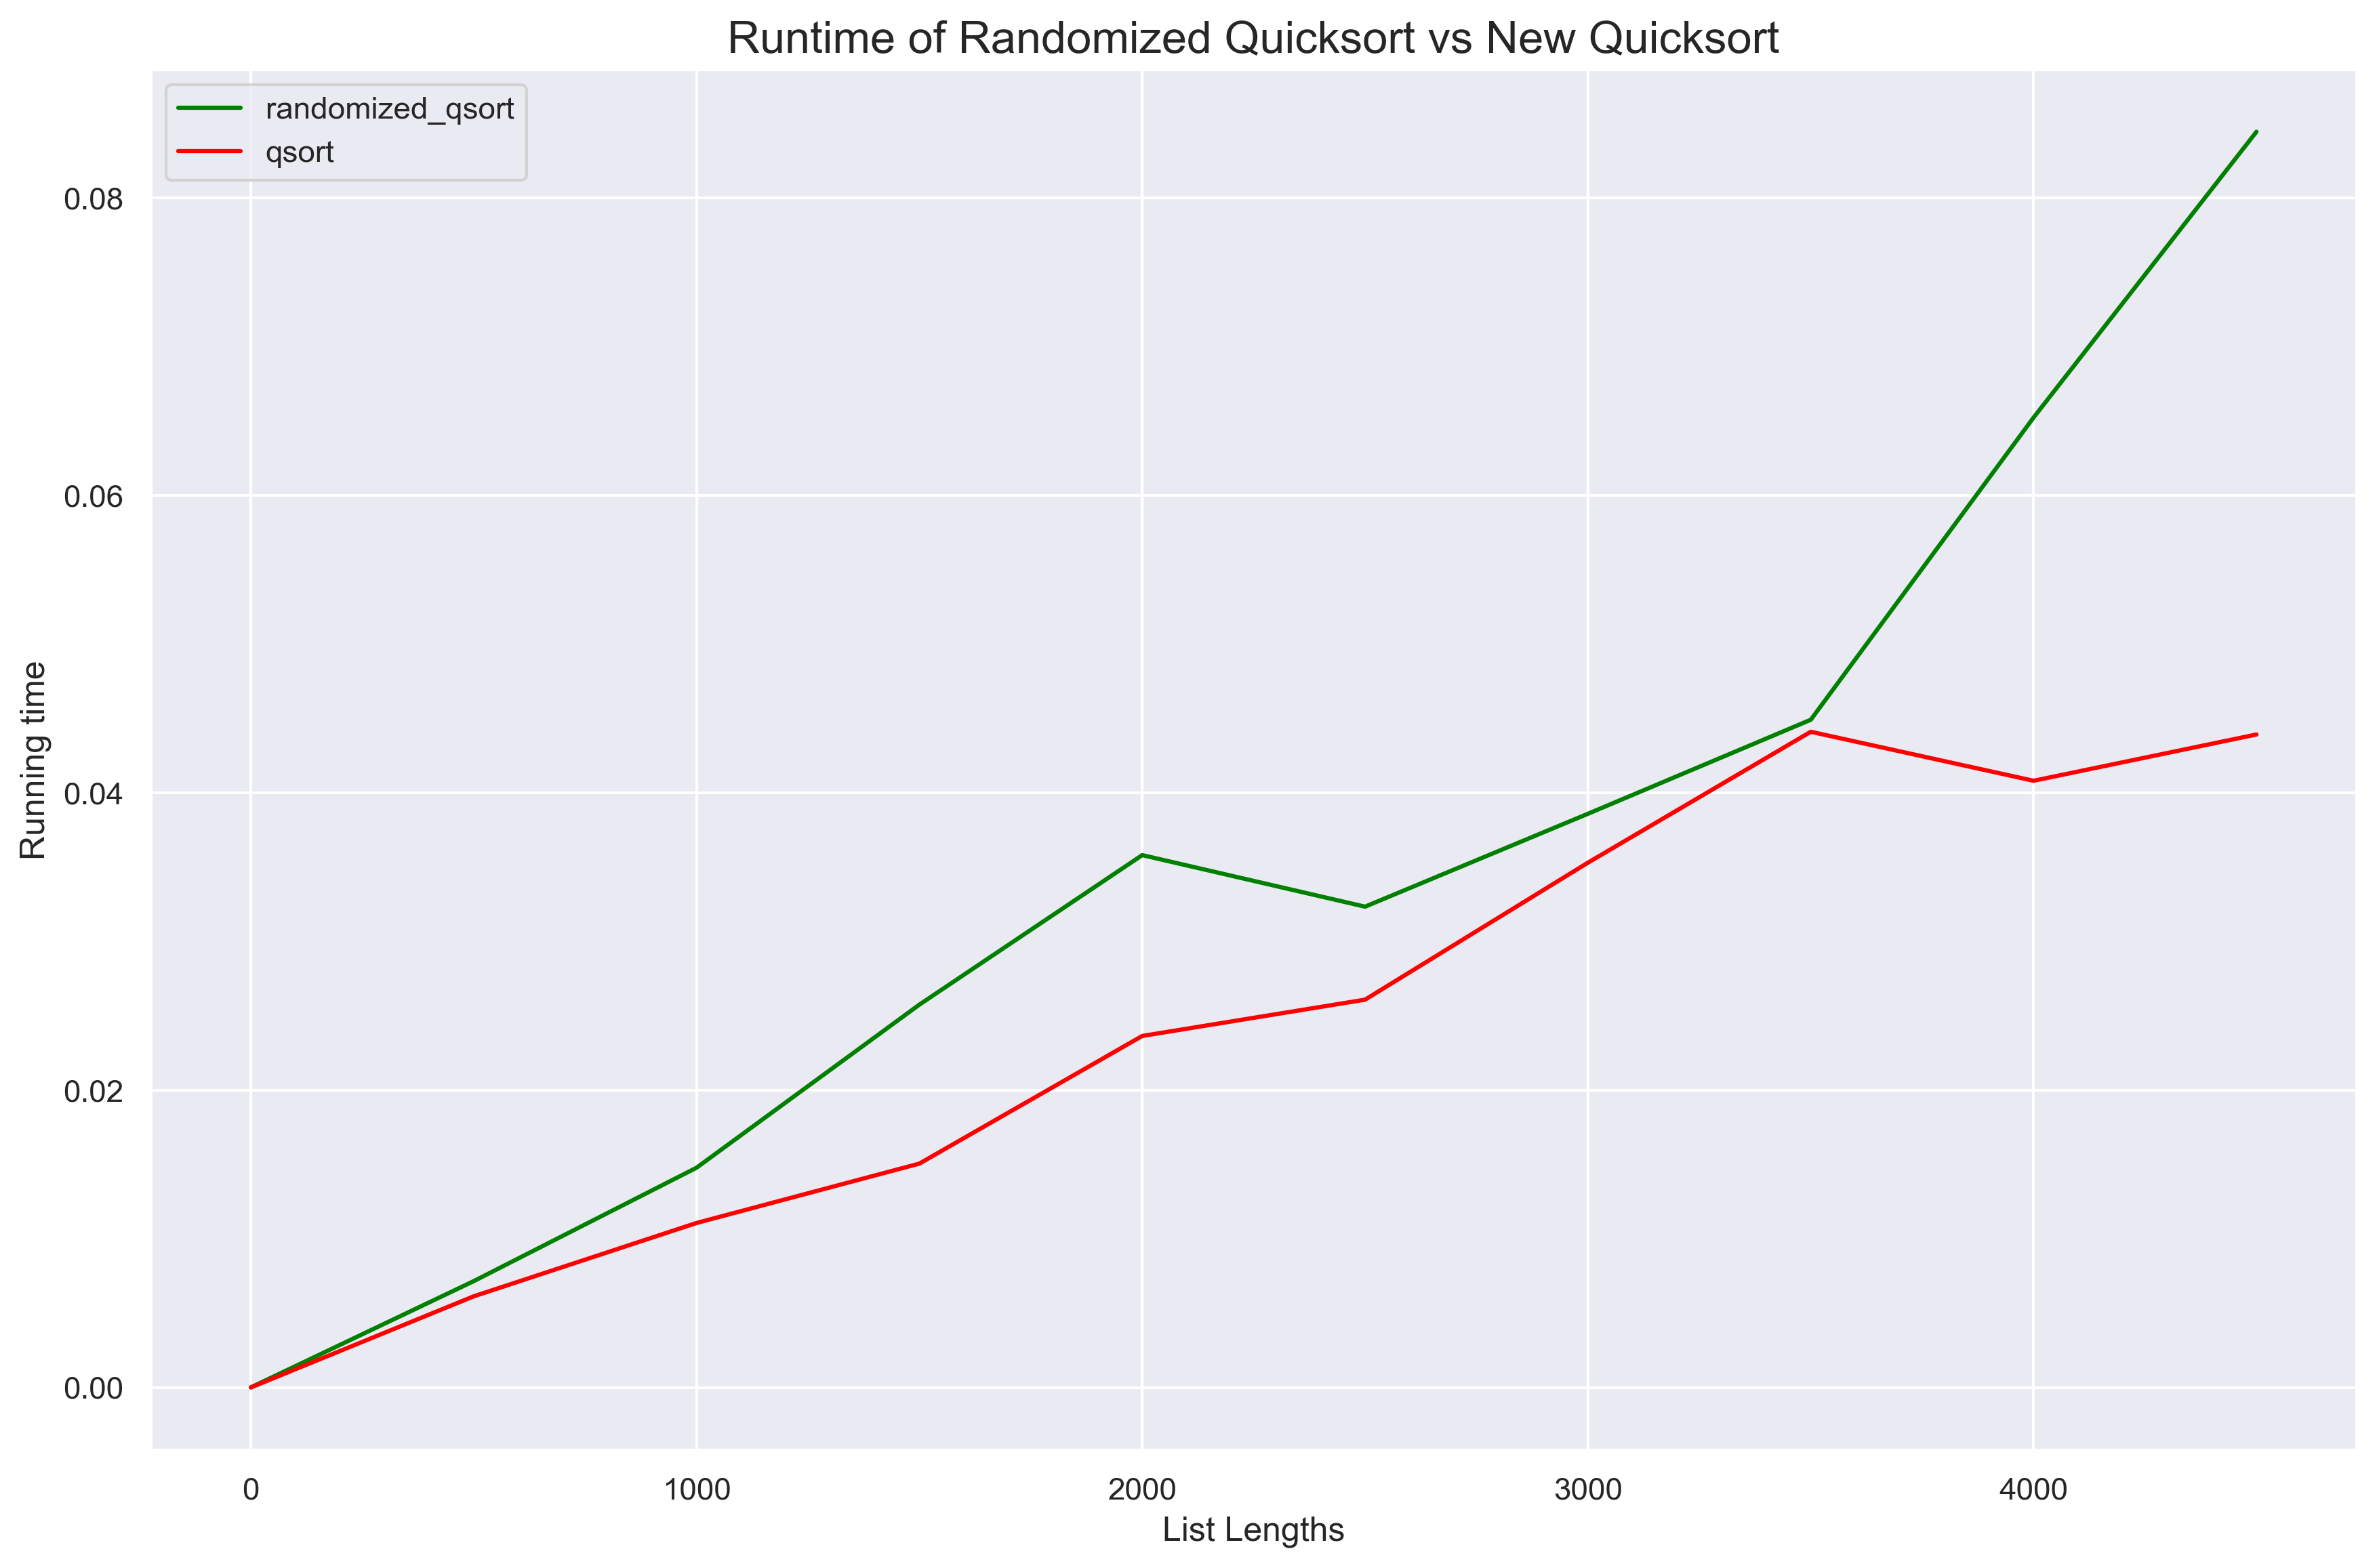

In [21]:
iterations_new = []
count_new = []

for i in range(10):
    
    N = 500*i
    count_new.append(N)
    
    array = [i for i in range(N)]
    
    iteration_new = 0 
    
    for _ in range(10):
        iteration_new += timeit.timeit('qsort(array)', 'from __main__ import qsort, array', number = 1)
        
    iterations_new.append(iteration_new/10)  

#raise NotImplementedError()

plt.figure(figsize=(14,9), dpi=300)
plt.title("Runtime of Randomized Quicksort vs New Quicksort", fontsize=16)
plt.plot(count, iterations, label="randomized_qsort", color="green")
plt.plot(count_new, iterations_new, label="qsort", color="red")
plt.xlabel("List Lengths")
plt.ylabel("Running time")
plt.legend()
plt.show()
#aise NotImplementedError()

## Question 5.

### Question 5a [time estimate: 3 minutes]

Remove the median-of-3 partitioning, and just use the first element in the array. 

In [32]:
def qsort(lst):    
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        partition = lst[0]

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


In [33]:
assert(qsort([4,2,1])==[1,2,4])
assert(qsort([0])==[0])

### Question 5b [time estimate: 3 minutes]

Does this change the running time of your algorithm? Justify your response with a graph. 



In [ ]:
iterations_newer = []
count_newer = []

for i in range(10):
    
    N = 500*i
    count_newer.append(N)
    
    array = [i for i in range(N)]
    
    iteration_newer = 0 
    
    for _ in range(10):
        iteration_newer += timeit.timeit('qsort(array)', 'from __main__ import qsort, array', number = 1)
        
    iterations_newer.append(iteration_new/10)  

#raise NotImplementedError()

plt.figure(figsize=(14,9), dpi=300)
plt.title("Runtime of Randomized Quicksort vs New Quicksort", fontsize=16)
plt.plot(count, iterations, label="randomized_qsort", color="green")
plt.plot(count_new, iterations_new, label="qsort", color="red")
plt.plot(count_newer, iterations_newer, label="qsort", color="black")
plt.xlabel("List Lengths")
plt.ylabel("Running time")
plt.legend()
plt.show()


## Part B. Recursive quicksort [time estimate: 5 minutes]

One main difference between the quicksort algorithms in Cormen et al. and the implementation in the code above is that quick sort (in the code in this notebook) is not recursive, while $QUICKSORT$ in Cormen et al. is. Given the limitation of Python so that it can only make 500 recursive calls, estimate the maximum size of the list that can be sorted by Python if a recursive quicksort is to be used. Explicitly state all assumptions you make in getting to an answer.


As we have learnt in class sessions about recursive trees, they perform O(N) on each level but the overall recursion equations is usually given by 2^N, if logN is involved in relating the depth to all the steps. Assuming this, we would need 8 splits down the recursion tree, sinse 2^8 will give us 256 and anything more will exceed the limitation. I.e 2^9 is 512 which is greater than 500